In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio de publicacion'] = df['fecha'].dt.year
df["mes de publicacion"] = df['fecha'].dt.month
df['preciousd'] = df['precio']/20

In [2]:
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio de publicacion,mes de publicacion,preciousd
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05,240000.000000,240000.000000,240000.000000
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06,2014.675383,7.440642,126541.917295
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06,1.358111,3.562888,107627.589881
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05,2012.000000,1.000000,15500.000000
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05,2014.000000,4.000000,47638.625000
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06,2015.000000,8.000000,92500.000000
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06,2016.000000,11.000000,169500.000000
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07,2016.000000,12.000000,626250.000000


# Analisis de los tipos de propiedades

In [3]:
df.sort_values('precio',ascending=False).head(6)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio de publicacion,mes de publicacion,preciousd
174276,153761,wtc oficina en venta piso 17,excelente oficina en venta en torre world trad...,Oficina comercial,Montecito 38,Benito Juárez,Distrito Federal,10.0,NaN,0.0,...,2015-09-04,0.0,0.0,0.0,0.0,0.0,12525000.0,2015,9,626250.0
209858,181271,excelente condominio ubicado al sur de la ciud...,condominio tipo mexicano moderno de 3 casas ub...,Casa,Congreso 210,Tlalpan,Distrito Federal,0.0,3.0,NaN,...,2016-10-25,0.0,0.0,0.0,1.0,1.0,12521000.0,2016,10,626050.0
81715,64975,amsterdam town house dos niveles y terraza,proyecto de imanol legorreta y carlos duclaud ...,Apartamento,Amsterdam,Cuauhtémoc,Distrito Federal,5.0,3.0,3.0,...,2016-05-16,0.0,0.0,0.0,1.0,1.0,12520000.0,2016,5,626000.0
192956,279973,departamento en kansas . col nápoles,"edificio de 5 niveles con 9 departamentos, ofr...",Apartamento,Kansas 167,Benito Juárez,Distrito Federal,0.0,2.0,2.0,...,2016-11-04,0.0,0.0,0.0,1.0,1.0,12516000.0,2016,11,625800.0
232457,165404,excelente casa de lujo en venta en jardines de...,¡excelente oportunidad de inversión! nosotros ...,Casa,CASCADA #24,Alvaro Obregón,Distrito Federal,5.0,4.0,NaN,...,2014-07-29,1.0,0.0,0.0,1.0,1.0,12515000.0,2014,7,625750.0
75131,193788,pent house polanco a 1 cuadra de reforma.,<p>edificio en donde la prioridad es aprovecha...,Apartamento,"Polanco, Miguel Hidalgo, Distrito Federal, México",Miguel Hidalgo,Distrito Federal,0.0,NaN,3.0,...,2013-10-10,0.0,0.0,0.0,0.0,0.0,12500000.0,2013,10,625000.0


In [4]:
propiedades_counts = df['tipodepropiedad'].value_counts()

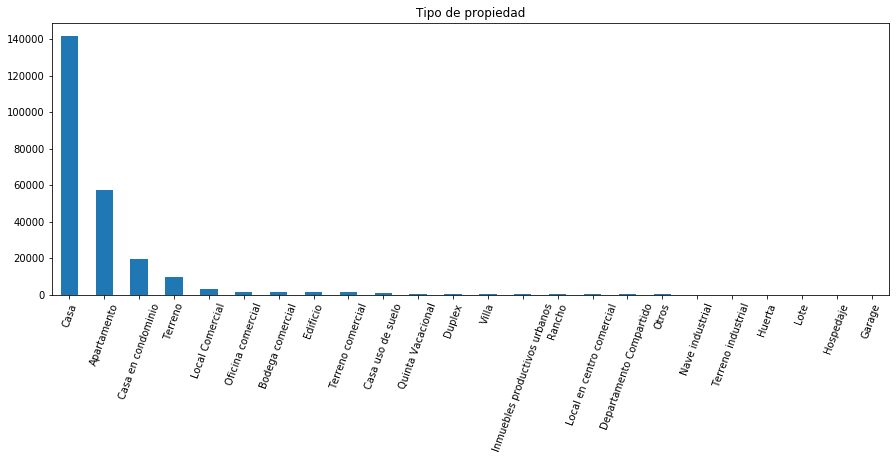

In [5]:
df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Tipo de propiedad");

# Analisis en las casas y apartamentos

Text(0, 0.5, 'Cantidad de casas')

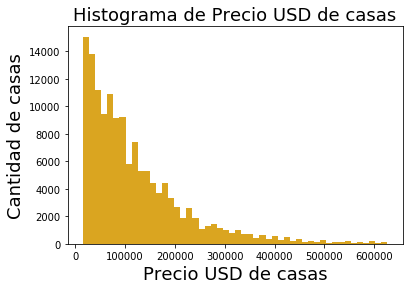

In [6]:
casas = df[df['tipodepropiedad'] == 'Casa']
g = casas['preciousd'].plot.hist(bins=50, color='goldenrod')
g.set_title("Histograma de Precio USD de casas", fontsize=18)
g.set_xlabel("Precio USD de casas",fontsize=18)
g.set_ylabel("Cantidad de casas", fontsize=18)

Text(0, 0.5, 'Cantidad de casas')

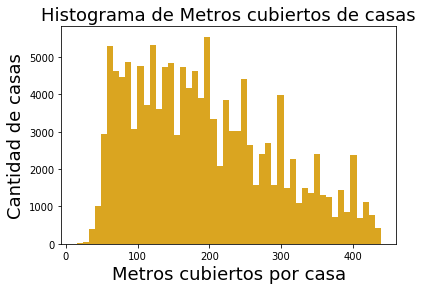

In [7]:
g = casas['metroscubiertos'].plot.hist(bins=50, color='goldenrod')
g.set_title("Histograma de Metros cubiertos de casas", fontsize=18)
g.set_xlabel("Metros cubiertos por casa",fontsize=18)
g.set_ylabel("Cantidad de casas", fontsize=18)

Text(0, 0.5, 'Cantidad de apartamentos')

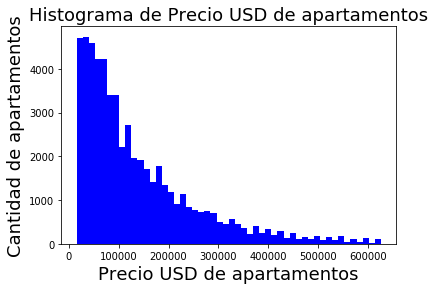

In [8]:
apartamentos = df[df['tipodepropiedad'] == 'Apartamento']
g = apartamentos['preciousd'].plot.hist(bins=50, color='blue')
g.set_title("Histograma de Precio USD de apartamentos", fontsize=18)
g.set_xlabel("Precio USD de apartamentos",fontsize=18)
g.set_ylabel("Cantidad de apartamentos", fontsize=18)

Text(0, 0.5, 'Cantidad de condominios')

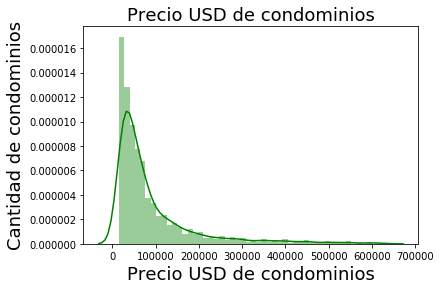

In [9]:
terreno = df[df['tipodepropiedad'] == 'Terreno']
g = sns.distplot(terreno['preciousd'], color='green', label='Terreno')
g.set_title("Precio USD de condominios", fontsize=18)
g.set_xlabel("Precio USD de condominios",fontsize=18)
g.set_ylabel("Cantidad de condominios", fontsize=18)

Text(0, 0.5, 'Cantidad de condominios')

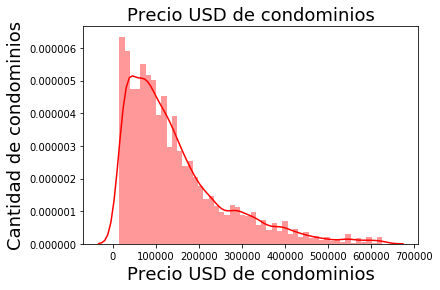

In [10]:
condominios = df[df['tipodepropiedad'] == 'Casa en condominio']
g = sns.distplot(condominios['preciousd'], color='red', label='Condominios')
g.set_title("Precio USD de condominios", fontsize=18)
g.set_xlabel("Precio USD de condominios",fontsize=18)
g.set_ylabel("Cantidad de condominios", fontsize=18)

Text(0.5, 1.0, 'Comparando las cantidades x precios')

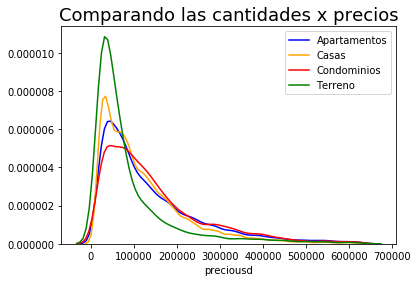

In [11]:
g = sns.distplot(apartamentos['preciousd'], color='blue', label='Apartamentos', hist=False)
g = sns.distplot(casas['preciousd'], color='orange', label='Casas', hist=False)
g = sns.distplot(condominios['preciousd'], color='red', label='Condominios', hist=False)
g = sns.distplot(terreno['preciousd'], color='green', label='Terreno',hist=False)
g.set_title("Comparando las cantidades x precios", fontsize=18)

Faltaria hacer un multiple histograma plot para poder comparar todos de manera mas sencilla

# Analisis por provincia

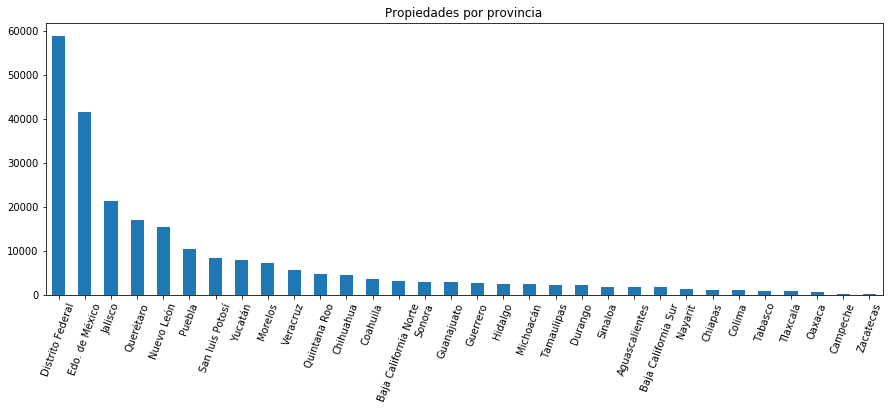

In [12]:
df.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia");

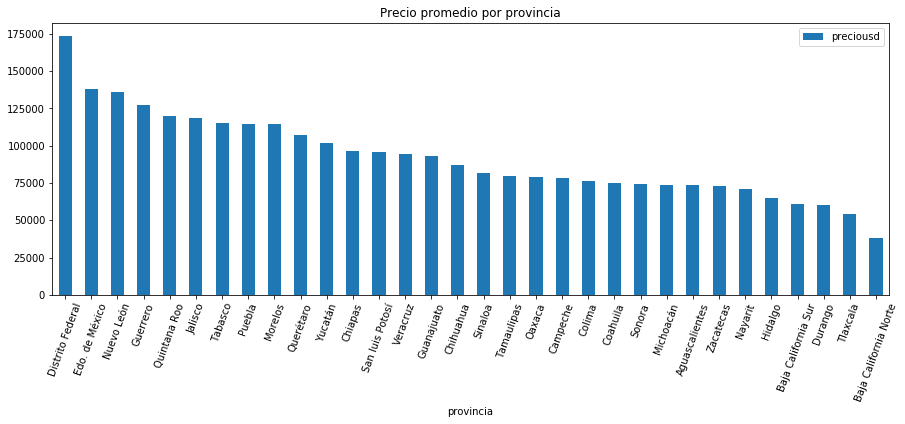

In [13]:
df.groupby('provincia').agg({'preciousd': 'mean'})\
    .sort_values('preciousd', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Precio promedio por provincia")

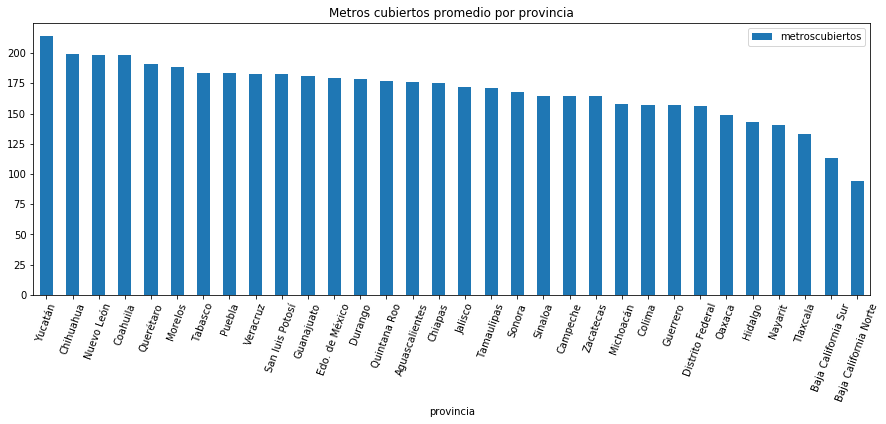

In [14]:
df.groupby('provincia').agg({'metroscubiertos': 'mean'})\
    .sort_values('metroscubiertos', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Metros cubiertos promedio por provincia");

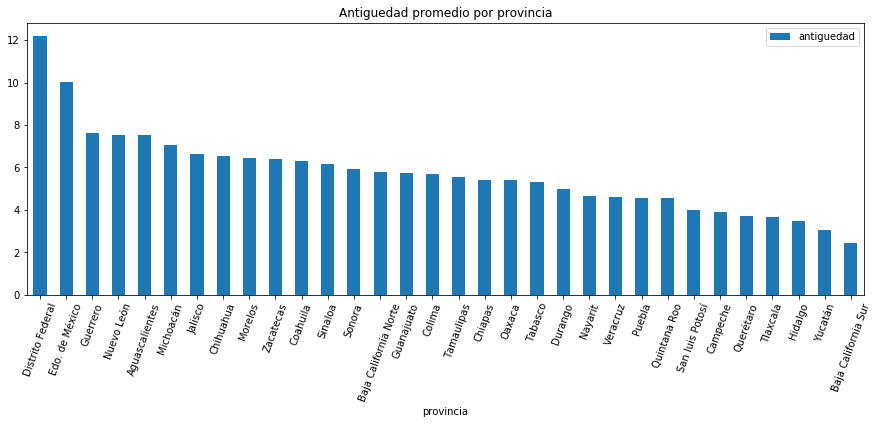

In [15]:
df.groupby('provincia').agg({'antiguedad': 'mean'})\
    .sort_values('antiguedad', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Antiguedad promedio por provincia");

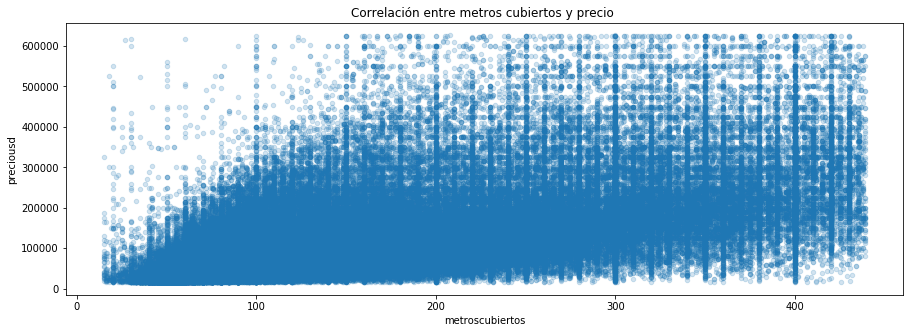

In [16]:
df.plot.scatter(x='metroscubiertos', y='preciousd',alpha = 0.2, figsize=(15, 5), title="Correlación entre metros cubiertos y precio ")
plt.ticklabel_format(style = 'plain')

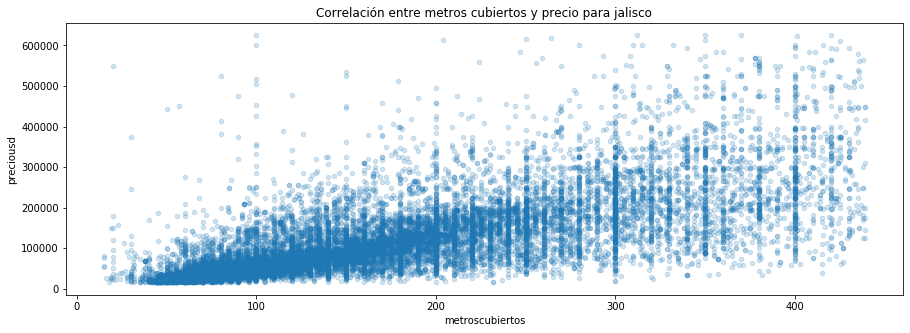

In [17]:
#Hay muchos valores atipicos
jalisco=df[df['provincia']=="Jalisco"]
jalisco.plot.scatter(x='metroscubiertos', y='preciousd',alpha=0.2, figsize=(15, 5), title="Correlación entre metros cubiertos y precio para jalisco")
plt.ticklabel_format(style = 'plain')


(10, -0.1)

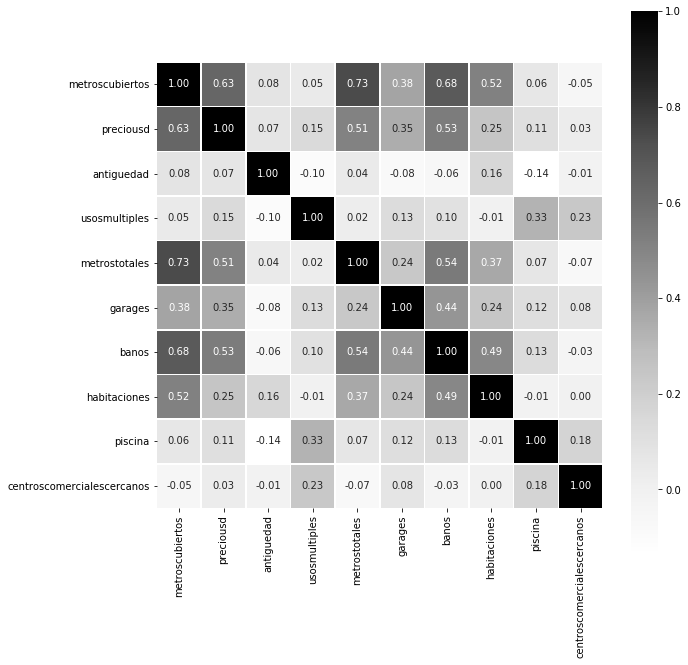

In [18]:
forheatmap = df.loc[:, ["metroscubiertos","preciousd","antiguedad","usosmultiples","metrostotales","garages","banos","habitaciones","piscina","centroscomercialescercanos"]]
plt.figure(figsize=(10, 10))
sns.heatmap(forheatmap.corr(), square=True, annot=True, fmt='.2f', linewidths=.5,cmap="Greys").set_ylim(10,-0.1)

Del plot anterior se puede decir que a medida que tengo mas metros cubiertos, aumenta el valor, seguido de metros totales y banos. No tiene mucha importancia la piscina, los usos multiples y la antiguedad a la hora de ver el precio. Se puede ver como si aumentan los metros cubiertos, aumentan los baños mas que las habitaciones.


Text(0, 0.5, 'Latitud')

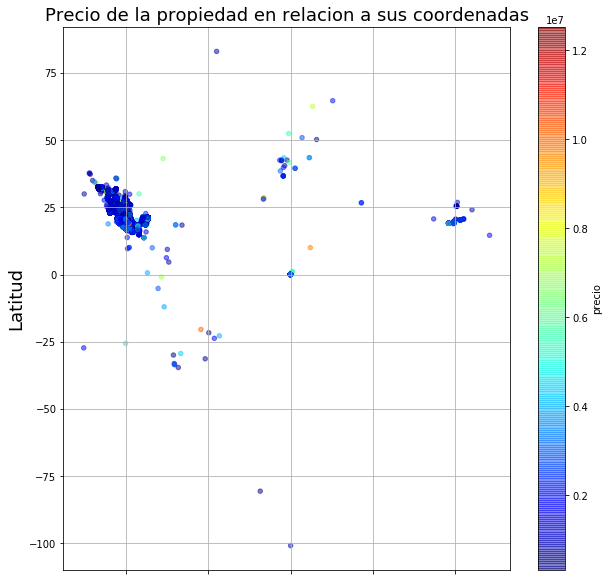

In [19]:
#Al realizar el plot por propiedades, tuve que eliminar las propiedades con lat/lng null, 
#eliminadas el %50 de propiedades. No es un buen grafico
g = df.plot(kind="scatter", x="lng", y="lat",
    c="precio", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.5, figsize=(10,10),grid=True)
g.set_title("Precio de la propiedad en relacion a sus coordenadas",fontsize=18)
g.set_xlabel("Longitud",fontsize=18)
g.set_ylabel("Latitud", fontsize=18)

lng                51.453333
lat                51.453333
direccion          22.113333
metrostotales      21.444583
antiguedad         18.147917
garages            15.735417
idzona             11.925417
banos              10.925417
habitaciones        9.362917
metroscubiertos     7.250000
titulo              2.244583
descripcion         0.674583
ciudad              0.155000
provincia           0.064583
tipodepropiedad     0.019167
dtype: float64

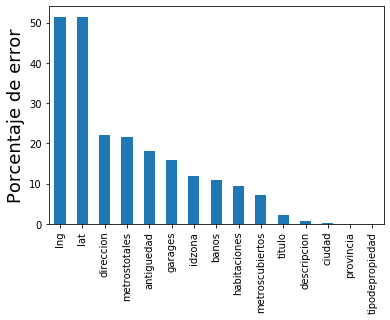

In [20]:
#Porcentaje de errores eliminando los que tienen un 0%
#El Tot de habitaciones tiene 25% de error
errores_de_nan = (df.isnull().sum() / len(df)) * 100
errores_de_nan = errores_de_nan.drop(errores_de_nan[errores_de_nan == 0].index).sort_values(ascending=False)
errores_de_nan.plot(kind="bar").set_ylabel("Porcentaje de error", fontsize=18)
errores_de_nan

# Analisis de habitaciones totales por propiedades
### Tomando como habitaciones totales = garage + habitaciones + baños

In [21]:
df["Tot Habitaciones"]= df["banos"].values+df["habitaciones"].values+df["garages"].values

In [22]:
df["Tot Habitaciones"].value_counts().sort_index()

2.0       797
3.0      6271
4.0     24996
5.0     23314
6.0     29146
7.0     40710
8.0     28337
9.0     17112
10.0     6977
11.0     2173
12.0      504
13.0      170
14.0       89
15.0       31
16.0       13
17.0        4
Name: Tot Habitaciones, dtype: int64

Text(0, 0.5, 'Cantidad de propiedades')

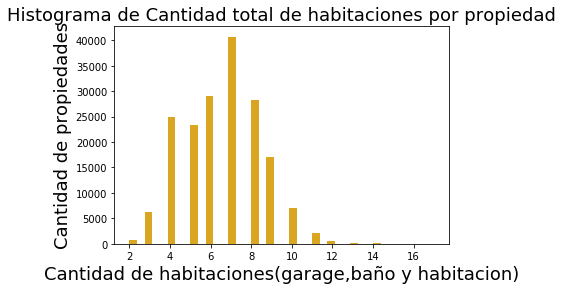

In [23]:
todo = df.loc[:,['tipodepropiedad',"Tot Habitaciones"] ]
g = todo['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por propiedad", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage,baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de propiedades", fontsize=18)

Text(0, 0.5, 'Cantidad de casas')

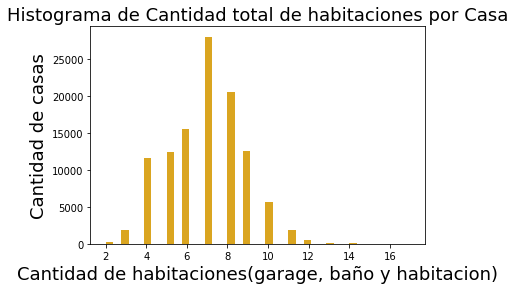

In [24]:
casa = df.loc[lambda x:x['tipodepropiedad'] == "Casa",["Tot Habitaciones"] ]
g = casa['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por Casa", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de casas", fontsize=18)

Text(0, 0.5, 'Cantidad de Apartamentos')

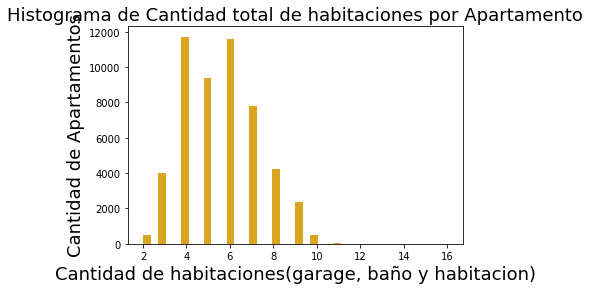

In [25]:
apart = df.loc[lambda x:x['tipodepropiedad'] == "Apartamento",["Tot Habitaciones"] ]
g = apart['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por Apartamento", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de Apartamentos", fontsize=18)

Text(0, 0.5, 'Cantidad de propiedades')

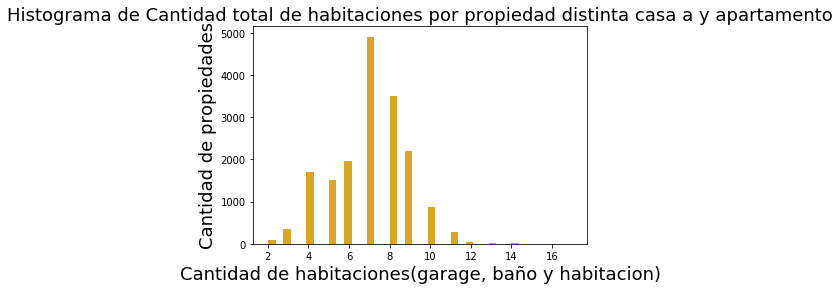

In [26]:
#Nose como usar condicionales con lambda (x[algo] != a dos cosas)
otros = df.loc[lambda x: x['tipodepropiedad'] != "Apartamento",:]
otros = otros.loc[lambda x: x['tipodepropiedad'] !="Casa" ,["Tot Habitaciones"]]
g = otros['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por propiedad distinta casa a y apartamento", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de propiedades", fontsize=18)

In [27]:
df.groupby("tipodepropiedad").agg({"habitaciones":"mean","garages":"mean","banos":"mean","preciousd":"mean","metroscubiertos":"mean","metrostotales":"mean"})#.fillna(value=0)
#df[df["tipodepropiedad"]=="Lote"].describe()

,habitaciones,garages,banos,preciousd,metroscubiertos,metrostotales
tipodepropiedad,,,,,,
Apartamento,2.386533,1.410242,1.816817,138188.433112,117.048657,117.907762
Bodega comercial,2.630573,0.484677,1.847185,134687.884922,251.153639,261.715040
Casa,3.092080,1.705926,2.240429,119907.885493,194.026911,183.767889
Casa en condominio,2.957132,1.908157,2.366065,144946.352091,187.697231,169.728656
Casa uso de suelo,4.284861,1.427350,2.404719,186623.461370,254.068966,228.425710
Departamento Compartido,2.598540,1.401460,1.791045,128008.094681,127.654676,130.405941
Duplex,2.541176,1.181548,1.360947,63587.898688,100.215976,100.283019
Edificio,6.128713,0.725086,2.626703,250474.968625,291.231944,231.461169
Huerta,2.428571,0.000000,1.625000,177167.500000,139.400000,27.000000


Text(114.0, 0.5, 'Año de Publicacion')

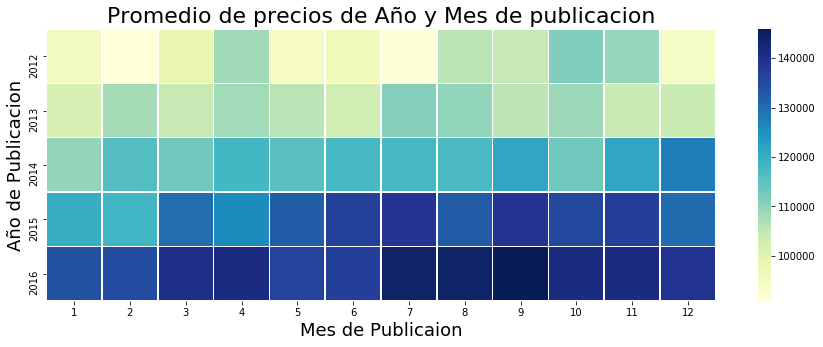

In [28]:
columnas = ["anio de publicacion","mes de publicacion","preciousd"]
publicado = df[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='preciousd', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Promedio de precios de Año y Mes de publicacion", fontsize=22)
g.set_xlabel("Mes de Publicaion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)

Text(114.0, 0.5, 'Año de Publicacion')

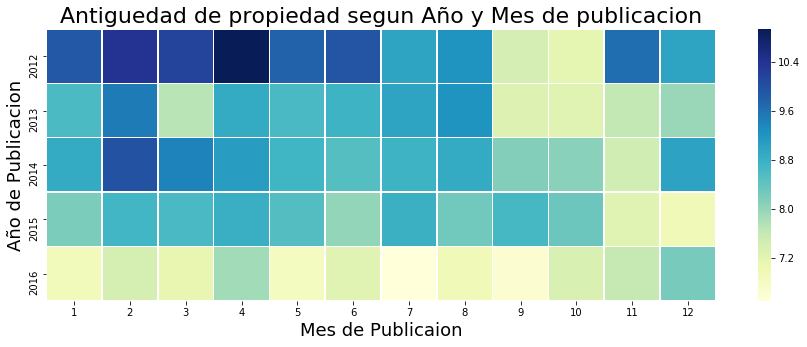

In [29]:
columnas = ["anio de publicacion","mes de publicacion","antiguedad"]
publicado = df[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='antiguedad', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Antiguedad de propiedad segun Año y Mes de publicacion", fontsize=22)
g.set_xlabel("Mes de Publicaion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)

mes de publicacion,1,2,3,4,5,6,7,8,9,10,11,12
anio de publicacion,,,,,,,,,,,,
2012,1528,1327,1103,1434,1857,1524,1973,3971,2598,3161,1608,1450
2013,1993,1401,1734,1829,2000,2016,2524,2374,3321,4056,4012,3126
2014,2403,2533,2916,2779,3071,3064,3125,3565,3911,3810,4613,4743
2015,4310,3869,3955,3783,3696,3804,3874,4525,4863,5551,4905,4329
2016,5775,4592,5022,6639,5438,6795,6013,6443,5929,6726,6086,28579


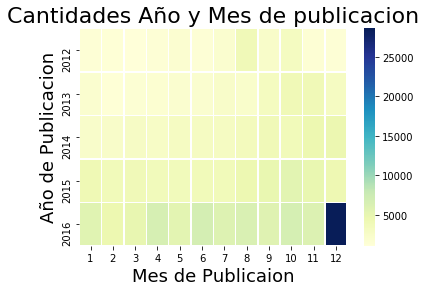

In [30]:
columnas = ["anio de publicacion","mes de publicacion","tipodepropiedad"]
publicado = df[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='tipodepropiedad', aggfunc='count')
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Cantidades Año y Mes de publicacion", fontsize=22)
g.set_xlabel("Mes de Publicaion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)
publicado

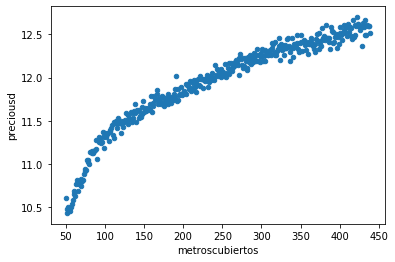

In [168]:
anio_por_props = df.groupby("metroscubiertos").agg({"preciousd":"mean"}).reset_index()
anio_por_props = anio_por_props[~((anio_por_props["metroscubiertos"]<50) & (anio_por_props["preciousd"]>30000))]
anio_por_props["preciousd"] = np.log1p(anio_por_props["preciousd"])
anio_por_props.plot(kind="scatter",x="metroscubiertos",y="preciousd")
